In [1]:
import json
import pandas as pd

from NewsBiasClustering import NewsBiasClusteringFromMetrics

In [2]:
print('Loading File')
file = open('rust-articles-backup-metrics.json', encoding='utf8')
articles = pd.DataFrame.from_dict(json.load(file))
print('File Loaded')

Loading File
File Loaded


dailymail
Counter({1: 27490, 0: 24841})


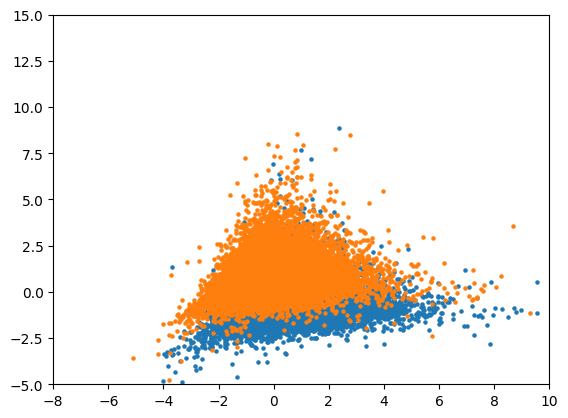

mirror
Counter({0: 6399, 1: 4133, 2: 2351, 3: 988, 4: 1})


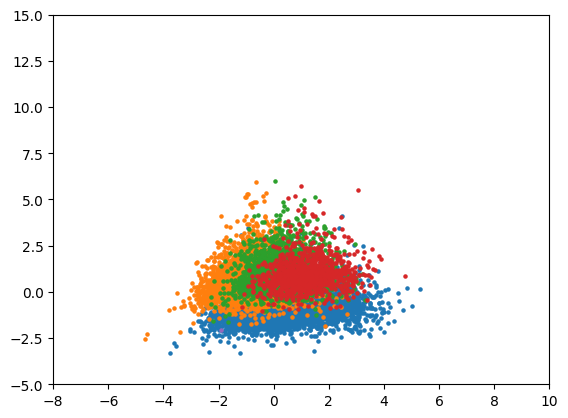

sun
Counter({4: 7176, 0: 6736, 3: 6340, 5: 6005, 1: 5589, 2: 618})


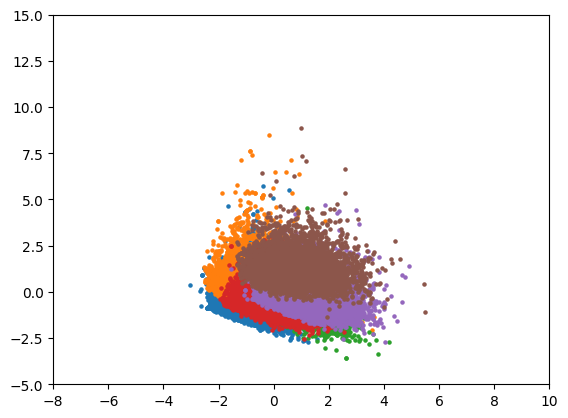

metro
Counter({0: 8816, 1: 6673})


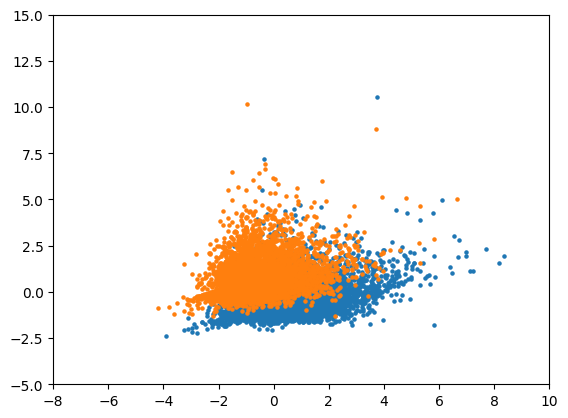

independent
Counter({1: 9008, 0: 6563})


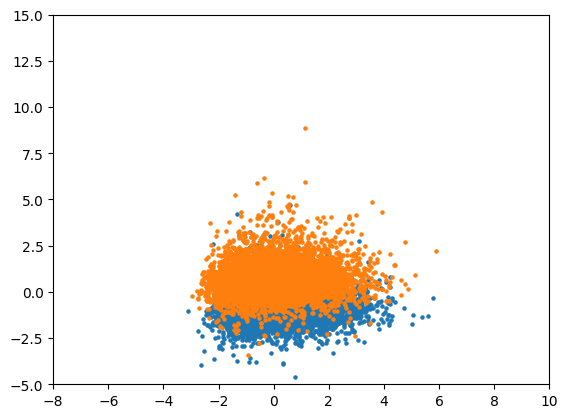

sky
Counter({0: 1711, 2: 1498, 1: 1202, 6: 905, 3: 277, 5: 241, 4: 151})


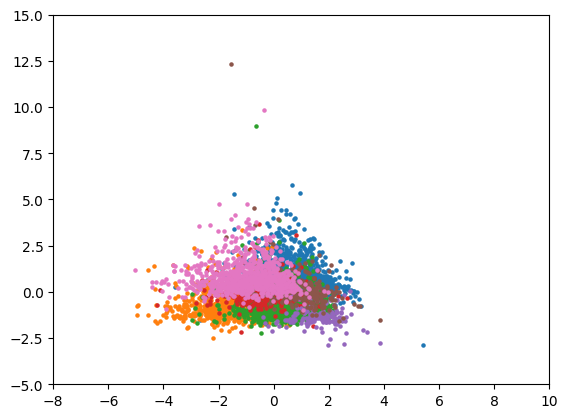

theguardian
Counter({1: 7904, 0: 6691})


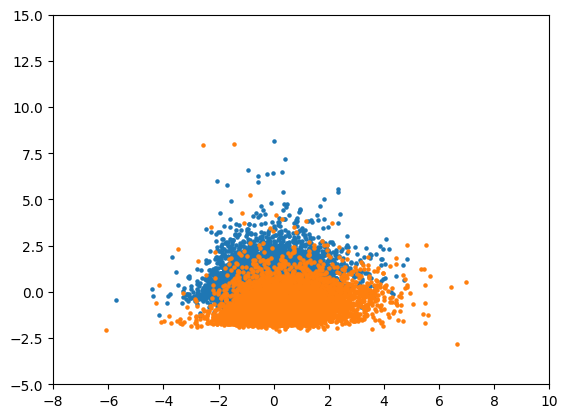

bbc
Counter({0: 5760, 1: 5158})


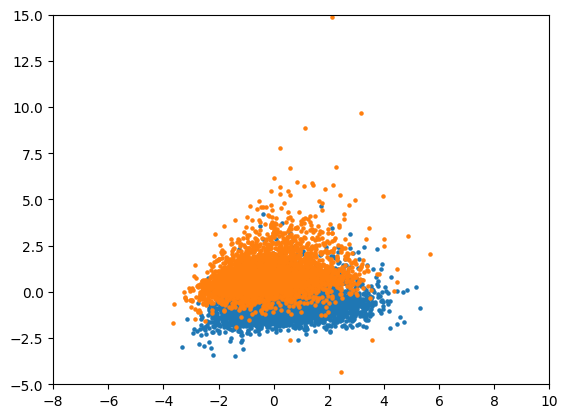

In [3]:
fullArticles = pd.DataFrame()
fullDominantMetrics = pd.DataFrame()
for publisher in list(set(articles['publisher'])):
    print(publisher)
    publisherArticles = articles[articles['publisher'] == publisher].reset_index(drop=True)
    metrics = []
    for i in range(len(publisherArticles)):
        sentiment = publisherArticles.iloc[i]['sentiment']
        quoteBased = publisherArticles.iloc[i]['quoteBased']
        sensationalized = publisherArticles.iloc[i]['sensationalized']
        mudslinging = publisherArticles.iloc[i]['mudslinging']
        spin = publisherArticles.iloc[i]['spin']
        informal = publisherArticles.iloc[i]['informal']
        metrics.append([sentiment, quoteBased, sensationalized, mudslinging, spin, informal])
    labels, dataPCA, dominantMetrics = NewsBiasClusteringFromMetrics(metrics)
    publisherArticles['publisherPC1'] = dataPCA['PC1']
    publisherArticles['PublisherPC2'] = dataPCA['PC2']
    publisherArticles['publisherLabel'] = labels
    fullArticles = pd.concat([fullArticles, publisherArticles])
    dominantMetrics['publisher'] = publisher
    fullDominantMetrics = pd.concat([fullDominantMetrics, dominantMetrics])
fullArticles = fullArticles.reset_index(drop=True)

In [4]:
fullDominantMetrics

,label,dominantMetrics,publisher
0,0,"[[sentiment, 0.9]]",dailymail
1,1,"[[sentiment, 0.1]]",dailymail
0,0,"[[sentiment, 0.9], [spin, 0.1]]",mirror
1,1,"[[quoteBased, 0.2], [informal, 0.2]]",mirror
2,2,"[[sentiment, 0.0]]",mirror
3,3,"[[spin, 0.1], [informal, 0.3]]",mirror
4,4,"[[quoteBased, 1.0], [sensationalized, 0.0], [m...",mirror
0,0,"[[quoteBased, 0.0], [spin, 0.1]]",sun
1,1,"[[sentiment, 0.1], [sensationalized, 0.0], [mu...",sun
2,2,"[[quoteBased, 0.0], [sensationalized, 0.0], [m...",sun


Counter({0: 84343, 1: 76882})


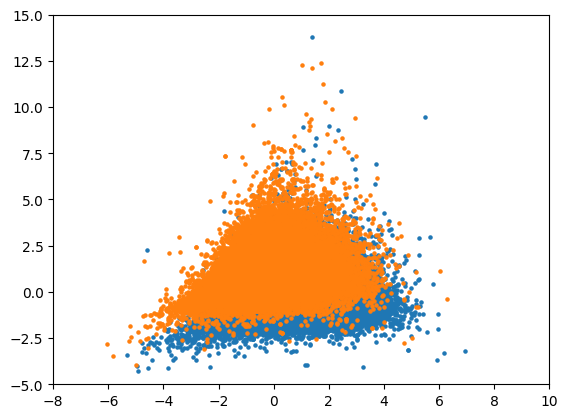

In [5]:
metrics = []
for i in range(len(fullArticles)):
    sentiment = fullArticles.iloc[i]['sentiment']
    quoteBased = fullArticles.iloc[i]['quoteBased']
    sensationalized = fullArticles.iloc[i]['sensationalized']
    mudslinging = fullArticles.iloc[i]['mudslinging']
    spin = fullArticles.iloc[i]['spin']
    informal = fullArticles.iloc[i]['informal']
    metrics.append([sentiment, quoteBased, sensationalized, mudslinging, spin, informal])
labels, dataPCA, dominantMetrics = NewsBiasClusteringFromMetrics(metrics)
fullArticles['fullPC1'] = dataPCA['PC1']
fullArticles['fullPC2'] = dataPCA['PC2']
fullArticles['fullLabel'] = labels
dominantMetrics['publisher'] = 'all'
fullDominantMetrics = pd.concat([fullDominantMetrics,dominantMetrics])
fullDominantMetrics = fullDominantMetrics.reset_index(drop=True)

In [10]:
"""
fullArticles.to_json('rust-articles-full.json')
fullDominantMetrics.to_json('rust-articles-full-dominant-metrics.json')
"""
fullDominantMetrics

,label,dominantMetrics,publisher
0,0,"[[sentiment, 0.9]]",dailymail
1,1,"[[sentiment, 0.1]]",dailymail
2,0,"[[sentiment, 0.9], [spin, 0.1]]",mirror
3,1,"[[quoteBased, 0.2], [informal, 0.2]]",mirror
4,2,"[[sentiment, 0.0]]",mirror
5,3,"[[spin, 0.1], [informal, 0.3]]",mirror
6,4,"[[quoteBased, 1.0], [sensationalized, 0.0], [m...",mirror
7,0,"[[quoteBased, 0.0], [spin, 0.1]]",sun
8,1,"[[sentiment, 0.1], [sensationalized, 0.0], [mu...",sun
9,2,"[[quoteBased, 0.0], [sensationalized, 0.0], [m...",sun
